You've recently joined FinTech Innovations, a growing financial technology company that partners with traditional banks to modernize their loan approval processes. As a junior data scientist on the Risk Analytics team, you've been tasked with developing a machine learning model to enhance the loan approval decision-making process.

The current loan approval process relies heavily on manual review by loan officers, leading to inconsistent decisions and slower response times to applicants. Your team believes that implementing a data-driven approach could standardize the process, reduce bias, and potentially identify creditworthy applicants who might be overlooked by traditional criteria.

You've been given access to a dataset of 20,000 past loan applications, including both denied and accepted applications, along with detailed applicant information and their subsequent payment behavior. This historical data provides a rich foundation for building either a classification model to automate approval decisions or a regression model to generate risk scores that can support loan officers' decisions.

From the business:

Cost of denying loans to creditworthy applicants: Average profit lost per missed good loan: $8,000.
Cost of approving bad loans that default: Average loss on defaulted loan: $50,000 (including principal and collection costs).

**The Challenge**

Your primary task is to develop a robust machine learning pipeline that can either:

Predict an applicant's risk score, likelihood of loan default (regression approach), which loan officers can use to make more informed decisions.
Or directly predict loan approval decisions (classification approach) to automate part of the screening process.
What makes this project particularly challenging and instructive is that it mirrors real-world complexity in several ways:

The data contains both numerical and categorical features requiring different preprocessing approaches.
Some features have missing values that need to be handled appropriately.
The dataset includes a mix of direct financial indicators and indirect behavioral signals.
The implications of model errors are significant and asymmetric (false approvals potentially more costly than false denials).
The model needs to be both accurate and interpretable to satisfy regulatory requirements.
Imbalanced classes create challenges around evaluation metrics and modelling.
This project will require you to:

Analyze the business context to select appropriate evaluation metrics.
Conduct thorough exploratory data analysis to understand feature relationships.
Design and implement preprocessing pipelines that handle different types of features.
Select and tune models while considering both performance and interpretability.
Evaluate results in the context of business objectives.
Document your process and findings professionally.
Success in this project means delivering not just a high-performing model, but a complete, well-documented solution that demonstrates your ability to:

Think critically about business problems.
Handle real-world data challenges.
Make and justify modeling decisions.
Consider practical implications of implementation.
Communicate technical findings to non-technical stakeholders.

Your final submission should follow the CRISP-DM framework, clearly documenting each step of your process and the reasoning behind your decisions. Remember that in real-world scenarios, the ability to explain and justify your approach is often as important as the technical implementation itself.

Key Considerations Throughout:

Document your reasoning for each significant decision.
Consider the business impact of technical choices.
Maintain awareness of potential biases and limitations.
Keep code organized and well-commented.
Create clear, informative visualizations.

**Part 1: Business Understanding and Planning Phase**
1) **Begin by thoroughly analyzing the business context of FinTech Innovations' loan approval process. Write a short summary that:**

    Describes the current manual process and its limitations.

    Identifies key stakeholders and their needs.

    Explains the implications of different types of model errors.

    Justifies your choice between classification and regression approaches.

2) **Define your modeling goals and success criteria:**

    Select appropriate evaluation metrics based on business impact.

    You must use at least two different metrics.

    Consider creating custom metric.

    Establish baseline performance targets.

    Document your reasoning for each choice.

**Begin by thoroughly analyzing the business context of FinTech Innovations' loan approval process. Write a short summary that:**

At FinTech Innovations, the current loan approval process relies on loan officers manually reviewing each application. They assess the applicant's financial data and make decisions based on their judgment. While this approach works, it comes with a number of limitations. The process is often slow, inconsistent, and subject to human bias, making it hard to scale as the volume of loan applications increases. As a result, decision-making can be delayed, and there’s a risk of unfairness when it comes to approving or denying loans. The increasing complexity of the business also makes it harder to handle large volumes of applicants efficiently.

There are several key stakeholders involved in this process. Loan officers need more efficient and consistent tools to help evaluate applicants accurately. Applicants themselves are looking for faster, fairer, and more transparent decisions. For FinTech Innovations, a scalable, data-driven solution is essential to reduce financial risk and improve the speed and reliability of loan approvals. Regulatory bodies, meanwhile, demand models that are both interpretable and fair to ensure compliance with legal standards. Lastly, the company’s partners, banks and financial institutions, need to reduce default rates while ensuring they’re approving loans for creditworthy applicants.

When it comes to model errors, the stakes are high. False positives, which involve approving loans that should have been denied, can result in substantial financial loss, sometimes up to $50,000 per bad loan. On the flip side, false negatives, which involve denying creditworthy applicants, mean missed opportunities, with an average profit loss of $8,000 per denied good loan. While the financial impact of false positives is significant and could hurt the company’s profitability and reputation, false negatives still represent a loss of potential business and could lead to unhappy customers.

For this reason, the classification approach makes more sense than a regression model. A classification model predicts whether a loan should be approved or denied, directly aligning with the company’s goal of automating the decision-making process. A regression model, which predicts a risk score, could provide helpful insights for loan officers, but it doesn’t automate the approval decision itself. Ultimately, using a classification model is a more straightforward and effective solution for streamlining loan approvals and aligning with business needs.

**Define your modeling goals and success criteria:**

The goal of the loan approval model is to automate decisions, reduce bias, speed up the process, and ensure consistent outcomes. To achieve success, the model must meet a few key criteria. First, accuracy is crucial, with a target of at least 85% to ensure reliability in loan decisions. It's also important to minimize false positives, aiming for a rate below 10%, as approving loans that shouldn't be approved can lead to significant financial losses. Minimizing false negatives is also critical, with a target under 15%, to avoid denying creditworthy applicants. Additionally, the model needs to be interpretable to comply with regulatory standards and allow for transparency in decision-making.

The model will also focus on reducing the financial cost of misclassification, particularly the high cost of false positives. Several evaluation metrics will be used to measure performance. Accuracy tracks the overall correctness of predictions, while precision ensures that approved loans are legitimate, helping to reduce costly mistakes. A custom cost metric will assess the financial impact of errors, while recall ensures that creditworthy applicants aren’t overlooked. The F1 score will balance precision and recall, providing an overall measure of model performance.

For baseline performance, the model should aim for 85% accuracy, with precision at least 75% to minimize false positives. Recall should target 70% to ensure that creditworthy applicants are not missed. The cost metric will be used to optimize the balance between false positives and false negatives, reducing financial losses. Lastly, the model must be interpretable to meet regulatory requirements and provide clarity in case of audits.

These goals and metrics will ensure that the model is effective, financially sound, and compliant with regulatory standards.

 1) 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.preprocessing import FunctionTransformer

df_loan = pd.read_csv('loan.csv')

**Part 2: Data Understanding and Exploration Phase**

3) **Conduct comprehensive exploratory data analysis:**

    Describe basic data characteristics.

    Examine distributions of all features and target variables.

    Investigate relationships between features.

    Create visualizations to help aid in EDA.

    Document potential data quality issues and their implications.

In [39]:
print(df_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [40]:
print(df_loan.describe())

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

In [41]:
print(df_loan.head())
print(df_loan.shape)

  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972     

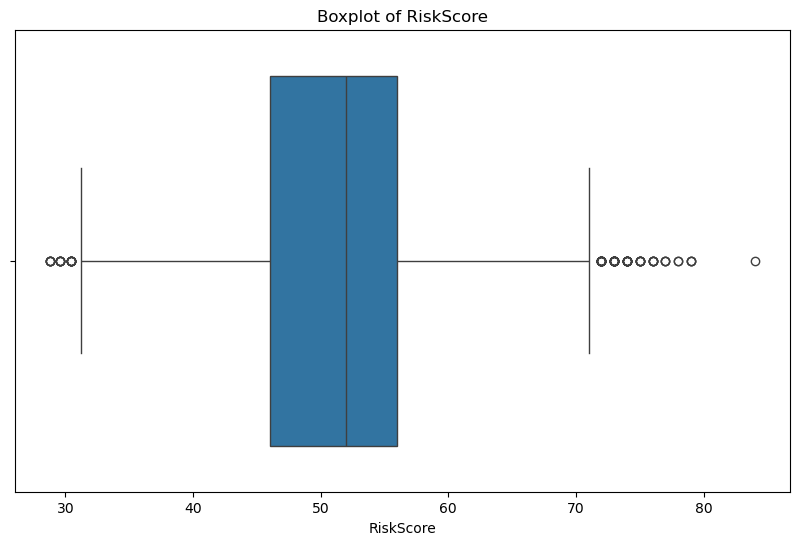

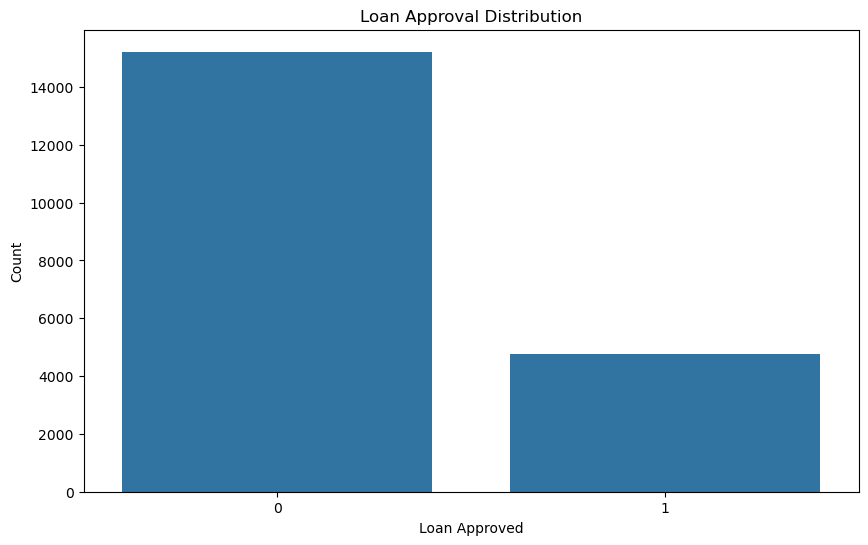

In [53]:
# Create visualizations to help aid in EDA.
# Boxplot for RiskScore to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_loan['RiskScore'])
plt.title('Boxplot of RiskScore')
plt.xlabel('RiskScore')
plt.show()

# Barplot for LoanApproved to see the distribution of loan approvals
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanApproved', data=df_loan)
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

4) **Develop feature understanding:**

    Categorize features by type (numerical, categorical, ordinal).

    Identify features requiring special preprocessing.

    Document missing value patterns and their potential meanings.

    Note potential feature engineering opportunities.

In [42]:
#Categorize features by type (numerical, categorical, ordinal).
# For Predicting Loan Approval (Classification)

# 1. Numerical features (int and float), excluding target variables
numerical_features = df_loan.select_dtypes(include=['int64', 'float64']).drop(['LoanApproved', 'RiskScore'], axis=1).columns.tolist()

# 2. Ordinal features (manually defined)
ordinal_features = ['EducationLevel', 'EmploymentStatus', 'MaritalStatus']

# 3. Date Features (e.g., ApplicationDate)
date_features = ['ApplicationDate']

# 4. Categorical features (excluding ordinal and date features)
categorical_features = df_loan.select_dtypes(include=['object']).columns.tolist()
categorical_features = [feature for feature in categorical_features if feature not in ordinal_features and feature not in date_features]


# 5. Identify features requiring special preprocessing

# Preprocessing for numerical features (e.g., scaling)
# Numerical features might need scaling for algorithms like KNN or Logistic Regression
print("\nNumerical features that may require scaling: ", numerical_features)

# Preprocessing for categorical features (e.g., encoding)
# Categorical features need encoding (One-Hot Encoding or Label Encoding)
print("\nCategorical features that require encoding: ", categorical_features)

# Preprocessing for ordinal features (e.g., Label Encoding)
# Ordinal features need encoding to preserve their order
print("\nOrdinal features that require encoding: ", ordinal_features)

# Preprocessing for date features (e.g., extracting year, month)
# Date features might require transformation (extract year, month, etc.)
print("\nDate features that may need transformation: ", date_features)

# 3. Document missing value patterns and their potential meanings
missing_values = df_loan.isnull().sum().sort_values(ascending=False)

# Check for columns with missing values
print("\nMissing values in each column (sorted):")
print(missing_values)


Numerical features that may require scaling:  ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio']

Categorical features that require encoding:  ['HomeOwnershipStatus', 'LoanPurpose']

Ordinal features that require encoding:  ['EducationLevel', 'EmploymentStatus', 'MaritalStatus']

Date features that may need transformation:  ['ApplicationDate']

Missing values in each column (sorted):
ApplicationDate               0
Age                           0
PaymentHistory                0
Lengt

**Part 3: Pipeline Development Phase**

5) Design your preprocessing strategy:

    Create separate preprocessing flows for different feature types.

    Must utilize ColumnTransformer and Pipeline.

    Consider using FeatureUnion as well.

    Handle missing values appropriately for each feature.

    Handle Categorical and Ordinal data appropriately.

    Scale numeric values if model requires it (linear model).

    Document your reasoning for each preprocessing decision.

In [43]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer



# For Regression (Predicting RiskScore)
X_regression = df_loan.drop(columns=['RiskScore', 'LoanApproved'])  # Drop target columns
y_regression = df_loan['RiskScore']  # Set the target variable for regression

# For Classification (Predicting LoanApproval)
X_classification = df_loan.drop(columns=['LoanApproved', 'RiskScore'])  # Drop target columns
y_classification = df_loan['LoanApproved']  # Set the target variable for classification


# Pipeline to scale numerical features and impute missing values
scaled_numeric = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean of each feature
    ('scaler', StandardScaler())  # Standardize the numerical features (mean = 0, variance = 1)
])

# Pipeline to impute numerical features without scaling (raw version)
passthrough_numeric = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values without scaling
])

# Use FeatureUnion to combine both scaling and passthrough preprocessing for numerical features
numerical_union = FeatureUnion([
    ('scaled', scaled_numeric),  # Scaled numerical features
    ('raw', passthrough_numeric)  # Non-scaled numerical features
])


# Pipeline to handle categorical features (impute missing values and apply OneHotEncoding)
categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncode categorical features (handle unknown values)
])


# Pipeline for ordinal features (using OrdinalEncoder)
ordinal_preprocessor = Pipeline([
    ('encoder', OrdinalEncoder())  # Encode ordinal features (preserve the natural ordering)
])


# Function to extract the year from the date column
def extract_year(df):
    return pd.to_datetime(df['ApplicationDate']).dt.year.to_frame()  # Extract the year as a new feature

# Pipeline to apply the date transformation (extract year)
date_preprocessor = Pipeline([
    ('date_transformer', FunctionTransformer(extract_year, validate=False))  # Extract year from 'ApplicationDate'
])


# Combine all preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical_union', numerical_union, numerical_features),  # Apply numerical preprocessing (scaled and raw)
    ('categorical', categorical_preprocessor, categorical_features),  # Apply categorical preprocessing
    ('ordinal', ordinal_preprocessor, ordinal_features),  # Apply ordinal preprocessing
    ('date', date_preprocessor, date_features)  # Apply date transformation (extract year)
])

**Part 4: Iterative Modeling Phase**

6) Implement your modeling approach:

    Choose appropriate model algorithms based on your problem definition.

    Set up validation strategy with chosen metrics.

    Use a train test split and cross validation.

    Create complete pipeline including any preprocessing and model.

    Document your reasoning for each modeling decision.

In [44]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

# Creating the pipeline for the regression model, which includes preprocessing and fitting a RandomForestRegressor.
# RandomForestRegressor is used to predict the RiskScore (continuous target).
regression_model = Pipeline([
    ('preprocessor', preprocessor),  # Apply the preprocessor defined earlier to the input features.
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))  # Use 100 estimators, utilizing all cores
])

# Creating the pipeline for the classification model, which includes preprocessing and fitting a RandomForestClassifier.
# RandomForestClassifier is used to predict the LoanApproved (binary target).
classification_model = Pipeline([
    ('preprocessor', preprocessor),  # Apply the preprocessor to the input features.
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))  # Use 100 estimators, utilizing all cores
])

# Split the dataset into training and testing sets. The test size is set to 20% of the data, and a random_state is set for reproducibility.
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Fit the regression model to the training data
regression_model.fit(X_train_reg, y_train_reg)

# Predict on the test set using the fitted regression model
y_pred_reg = regression_model.predict(X_test_reg)

# Display regression model performance on the test set
print("\n[Regression] Test Set Performance:")
print(f"Regression MSE (Mean Squared Error): {mean_squared_error(y_test_reg, y_pred_reg):.2f}")  # Calculate and display MSE
print(f"Regression R² (R-squared): {r2_score(y_test_reg, y_pred_reg):.2f}")  # Calculate and display R²

# Perform cross-validation on the regression model using 5 folds
regression_scores = cross_validate(
    regression_model,  # Model to be validated
    X_regression,  # Features
    y_regression,  # Target variable
    cv=5,  # Use 5-fold cross-validation
    scoring={'r2': 'r2', 'mse': 'neg_mean_squared_error'},  # Metrics to evaluate
    return_train_score=True  # Also return training scores for analysis
)

# Display the cross-validation results
print("\n[Regression] Cross-Validation Results:")
print(f"Average R²: {regression_scores['test_r2'].mean():.4f}")  # Display average R² score across folds
print(f"Average MSE: {-regression_scores['test_mse'].mean():.2f}")  # Display average MSE across folds (negative MSE needs to be negated)


# Fit the classification model to the training data
classification_model.fit(X_train_clf, y_train_clf)

# Predict on the test set using the fitted classification model
y_pred_clf = classification_model.predict(X_test_clf)

# Display classification model performance on the test set
print("\n[Classification] Test Set Performance:")
print(f"Classification Accuracy: {classification_model.score(X_test_clf, y_test_clf):.4f}")  # Display accuracy score on test data


[Regression] Test Set Performance:
Regression MSE (Mean Squared Error): 7.56
Regression R² (R-squared): 0.88

[Regression] Cross-Validation Results:
Average R²: 0.8760
Average MSE: 7.50

[Classification] Test Set Performance:
Classification Accuracy: 0.9270


7) **Optimize your model:**
    
    Define parameter grid based on your understanding of the algorithms.

    Implement GridSearchCV and/or RandomizedSearchCV with chosen metrics.

    Consider tuning preprocessing steps.

    Track and document the impact of different parameter combinations.
    
    Consider the trade-offs between different model configuration.

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Grid for hyperparameter tuning of RandomForestRegressor
regressor_param_grid = {
    'regressor__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'regressor__max_depth': [None, 10, 20],  # Maximum depth of trees
    'regressor__min_samples_split': [2, 5],  # Minimum samples required to split a node
}


# RandomizedSearchCV allows for faster hyperparameter search by sampling randomly from the grid
# GridSearchCV would exhaustively search all combinations, which can be time-consuming
random_search_reg = RandomizedSearchCV(
    estimator=regression_model,
    param_distributions=regressor_param_grid,  # Hyperparameter grid
    n_iter=10,  # Number of random combinations to try
    scoring='r2',  # Use R² for evaluation
    cv=3,  # Cross-validation with 3 folds
    n_jobs=-1,  # Use all cores for parallel computation
    random_state=42,  # For reproducibility
    return_train_score=True  # Include training scores
)

# === 3. Fit RandomizedSearchCV to Training Data ===
random_search_reg.fit(X_train_reg, y_train_reg)

# === 4. Display the Best Parameters and R² Score ===
print("\n[Regression] Best Parameters:")
print(random_search_reg.best_params_)
print(f"Best R² Score: {random_search_reg.best_score_:.4f}")


[Regression] Best Parameters:
{'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__max_depth': None}
Best R² Score: 0.8707


In [46]:
# Randomized search grid for hyperparameter tuning of RandomForestClassifier
classifier_param_dist = {
    'classifier__n_estimators': randint(50, 200),  # Random number of trees
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'classifier__min_samples_split': randint(2, 10),  # Minimum samples required to split a node
    'classifier__max_features': ['sqrt', 'log2', None]  # Number of features to consider for splitting
}

#Use RandomizedSearchCV for Hyperparameter Tuning
random_search_clf = RandomizedSearchCV(
    classification_model,
    classifier_param_dist,  # Parameter distribution for randomized search
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Cross-validation with 3 folds
    scoring='accuracy',  # Use accuracy for evaluation
    n_jobs=-1,  # Use all cores for parallel computation
    random_state=42,  # For reproducibility
    return_train_score=True  # Include training scores
)

# === 3. Fit RandomizedSearchCV to Training Data ===
random_search_clf.fit(X_train_clf, y_train_clf)

# === 4. Display the Best Parameters and Accuracy ===
print("\n[Classification] Best Parameters:")
print(random_search_clf.best_params_)
print(f"\nBest Accuracy: {random_search_clf.best_score_:.4f}")


[Classification] Best Parameters:
{'classifier__max_depth': 30, 'classifier__max_features': None, 'classifier__min_samples_split': 7, 'classifier__n_estimators': 102}

Best Accuracy: 0.9288


**Part 5: Model Evaluation and Conclusion Phase**

8) Conduct thorough evaluation of final model:
    Assess models test data performance using your defined metrics.

    Analyze performance across different data segments.

    Identify potential biases or limitations.

    Visualize model performance.

    Classification: Confusion Matrix/ROC-AUC
    
    Regression: Scatter Plot (Predicted vs. Actual values).

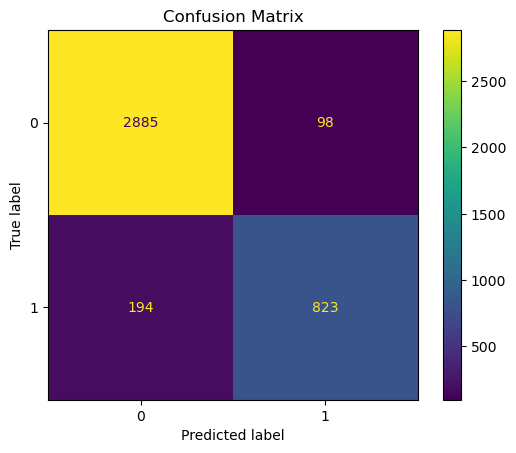

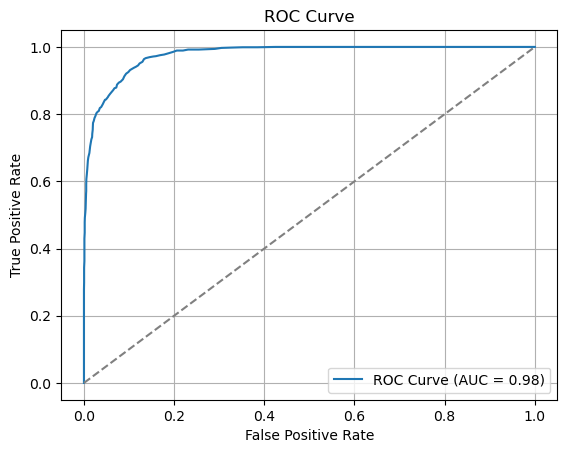

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for ROC AUC calculation
y_pred_proba = classification_model.predict_proba(X_test_clf)[:, 1]
# Predict classifications (0 or 1)
y_pred_clf = classification_model.predict(X_test_clf)


cm = confusion_matrix(y_test_clf, y_pred_clf)  # Calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Display confusion matrix
disp.plot()
plt.title("Confusion Matrix")  # Set title
plt.show()

#ROC Curve and AUC
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")  # Set title
plt.legend()
plt.grid(True)
plt.show()


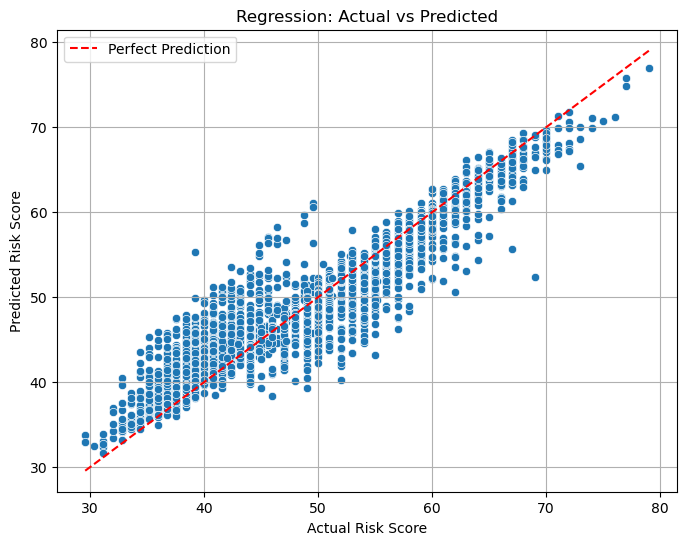

Regression R²: 0.8783
Regression MSE: 7.56


In [48]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions using the regression model
y_pred_reg = regression_model.predict(X_test_reg)

# === 2. Scatter Plot of Predicted vs Actual ===
plt.figure(figsize=(8, 6))
# Plot actual vs predicted values
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
# Add line for perfect prediction
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         '--', color='red', label='Perfect Prediction')

plt.xlabel("Actual Risk Score")  # X-axis label
plt.ylabel("Predicted Risk Score")  # Y-axis label
plt.title("Regression: Actual vs Predicted")  # Set plot title
plt.legend()
plt.grid(True)
plt.show()

# === 3. Print Metrics ===
# Calculate and print R² and MSE for the regression model
print(f"Regression R²: {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"Regression MSE: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")

In [21]:
# Confusion Matrix for the Classification Model (LoanApproved)
cm = confusion_matrix(y_test_clf, y_pred_clf)
tn, fp, fn, tp = cm.ravel()

# Cost of Denying Loans to Creditworthy Applicants (False Negatives)
false_negatives_cost = fn * 8000  # $8,000 per missed good loan

# Cost of Approving Bad Loans (False Positives)
false_positives_cost = fp * 50000  # $50,000 per bad loan approved

# Print the results
print(f"Cost of denying loans to creditworthy applicants (False Negatives): ${false_negatives_cost:,.2f}")
print(f"Cost of approving bad loans that default (False Positives): ${false_positives_cost:,.2f}")

# Total cost
total_cost = false_negatives_cost + false_positives_cost
print(f"Total financial cost: ${total_cost:,.2f}")

Cost of denying loans to creditworthy applicants (False Negatives): $1,552,000.00
Cost of approving bad loans that default (False Positives): $4,900,000.00
Total financial cost: $6,452,000.00


9) **Extract and interpret feature importance/significance.**

    Which features had the most impact on your model?

    Does this lead to any potential business recommendations?

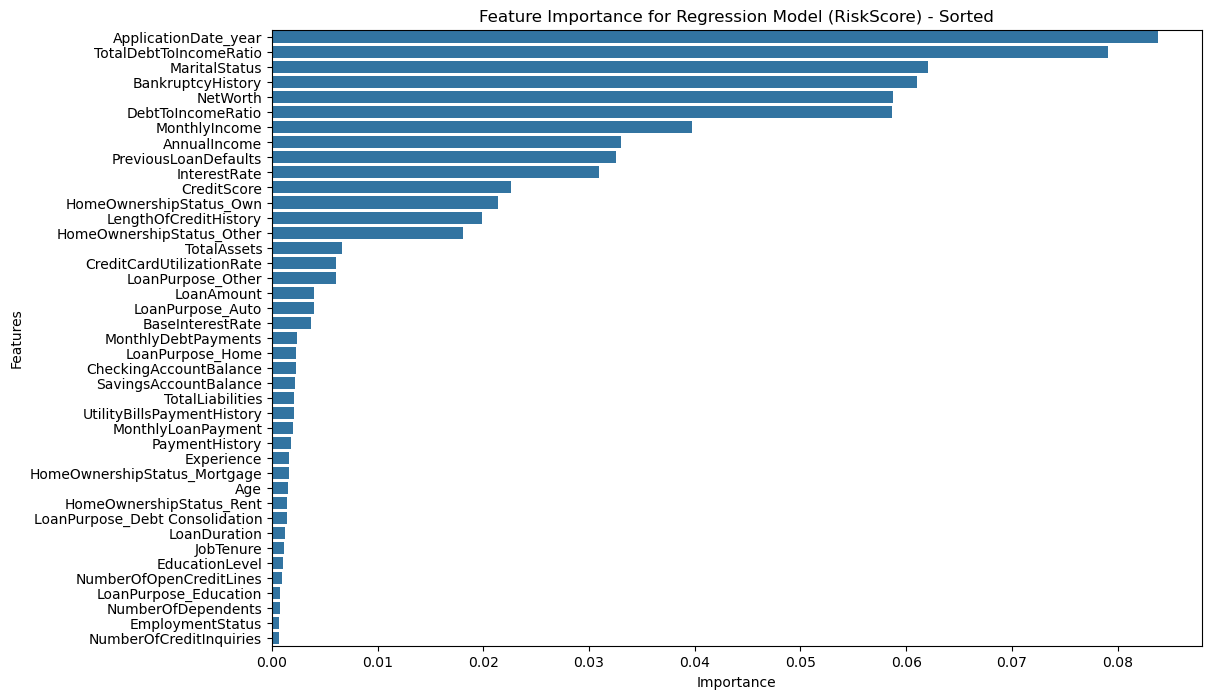

In [36]:
# --- For Regression (RiskScore) ---

# Get the feature importances from the regression model
regressor = regression_model.named_steps['regressor']
regressor_importances = regressor.feature_importances_

# Get all feature names from the preprocessor
# This will include numerical, categorical, ordinal, and date features
numerical_feature_names = numerical_features  # As defined in your dataset
categorical_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
ordinal_feature_names = ordinal_features  # As defined in your dataset
date_feature_name = ['ApplicationDate_year']  # Manually create a name for the date feature (year extraction)

# Combine all feature names for the regression model
all_feature_names = numerical_feature_names + categorical_feature_names.tolist() + ordinal_feature_names + date_feature_name

# Check if lengths match, if not, truncate the list to match the feature importance length
if len(all_feature_names) > len(regressor_importances):
    all_feature_names = all_feature_names[:len(regressor_importances)]  # Truncate the names list
elif len(all_feature_names) < len(regressor_importances):
    # If there are more feature importances than feature names, truncate the importances list
    regressor_importances = regressor_importances[:len(all_feature_names)]

# Sort the feature importances and corresponding feature names in descending order for Regression
sorted_indices_reg = np.argsort(regressor_importances)[::-1]  # Sort indices in descending order
sorted_importances_reg = regressor_importances[sorted_indices_reg]  # Sort the importances
sorted_feature_names_reg = np.array(all_feature_names)[sorted_indices_reg]  # Sort the feature names

# Plot feature importance for the regression model (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances_reg, y=sorted_feature_names_reg)
plt.title('Feature Importance for Regression Model (RiskScore) - Sorted')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

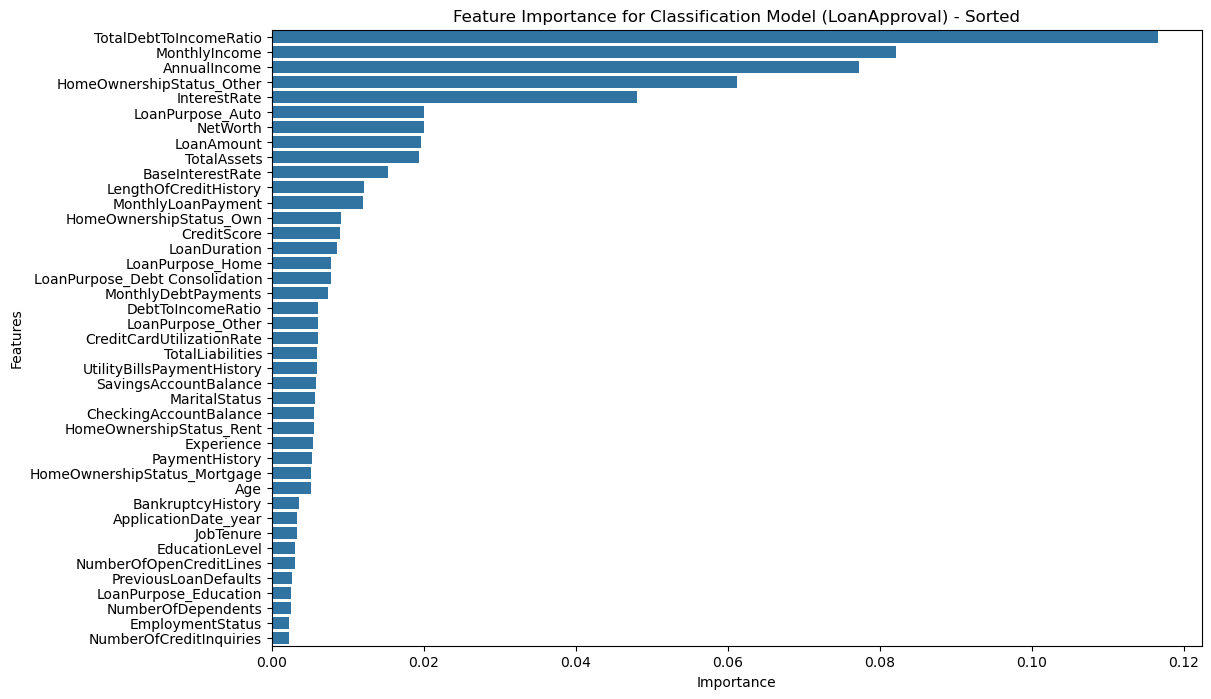

In [37]:
# --- For Classification (LoanApproval) ---

# Get the feature importances from the classification model
classifier = classification_model.named_steps['classifier']
classifier_importances = classifier.feature_importances_

# Combine all feature names for the classification model
all_feature_names_clf = numerical_feature_names + categorical_feature_names.tolist() + ordinal_feature_names + date_feature_name

# Check if lengths match, if not, truncate the list to match the feature importance length
if len(all_feature_names_clf) > len(classifier_importances):
    all_feature_names_clf = all_feature_names_clf[:len(classifier_importances)]  # Truncate the names list
elif len(all_feature_names_clf) < len(classifier_importances):
    # If there are more feature importances than feature names, truncate the importances list
    classifier_importances = classifier_importances[:len(all_feature_names_clf)]

# Sort the feature importances and corresponding feature names in descending order for Classification
sorted_indices_clf = np.argsort(classifier_importances)[::-1]  # Sort indices in descending order
sorted_importances_clf = classifier_importances[sorted_indices_clf]  # Sort the importances
sorted_feature_names_clf = np.array(all_feature_names_clf)[sorted_indices_clf]  # Sort the feature names

# Plot feature importance for the classification model (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances_clf, y=sorted_feature_names_clf)
plt.title('Feature Importance for Classification Model (LoanApproval) - Sorted')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The feature importance analysis from both the regression and classification models provides valuable insights that can lead to several strategic business recommendations aimed at improving loan decision-making and reducing financial risks.

1) Focus on Debt-to-Income Ratio and Net Worth: The TotalDebtToIncomeRatio and NetWorth are consistently highlighted as key factors across both the risk score and loan approval models. This suggests that businesses should give considerable weight to these metrics when assessing an applicant's ability to repay a loan. For instance, applicants with high debt-to-income ratios or low net worth could be considered higher risk and may be subject to more stringent approval criteria. On the flip side, applicants with lower debt-to-income ratios and higher net worth should be prioritized for loan approval, as they are likely to pose less financial risk.

2) Targeted Loan Products Based on Income: MonthlyIncome is a critical factor in both models, with higher incomes increasing the likelihood of loan approval and suggesting a lower risk for the business. Financial institutions could consider tailoring loan products for different income brackets. For example, offering larger loans or more favorable terms to high-income applicants, while providing smaller loans or higher interest rates to lower-income applicants, could help mitigate risk and maximize returns.

3) Credit Score Optimization: CreditScore emerges as one of the most important features in predicting loan approval. Businesses could use this information to refine their credit scoring models or offer personalized financial advice to applicants looking to improve their credit scores. For applicants with lower credit scores, the business could offer secured loans or smaller amounts with higher interest rates as a way to manage the risk while still providing financial opportunities to individuals who might otherwise be denied.

4) Marital and Homeownership Status: The analysis of MaritalStatus and HomeOwnershipStatus shows their impact on both loan approval and risk score. Marital status can indicate the stability of an applicant's financial situation, while homeownership status, particularly HomeOwnershipStatus_Other, reveals risk patterns based on housing arrangements. Financial institutions may consider using these factors to segment applicants more effectively. For example, married applicants or those with stable homeownership situations may be considered lower-risk and thus eligible for better loan terms.

5) Customized Risk Assessment for Loan Purpose: Features such as LoanPurpose_Auto and LoanPurpose_Home can be used to assess risk based on the type of loan an applicant is seeking. Auto loans might carry a different risk profile compared to home loans or personal loans. By integrating this feature into the risk assessment model, businesses can better tailor their loan offerings to match the purpose of the loan, offering more favorable terms for lower-risk purposes and stricter terms for higher-risk loans.

6) Leveraging the Application Date: The ApplicationDate_year feature indicates that the year of application might affect the risk profile of an applicant, possibly due to economic changes or fluctuations in the financial market. Businesses should track these trends and adjust their loan approval strategies to account for economic cycles. For example, in times of economic downturn, stricter criteria could be applied to new applicants, while in boom periods, the business could afford to be more lenient.

In summary, the findings from the feature importance analysis offer concrete recommendations for businesses to refine their loan approval processes. By incorporating factors such as debt-to-income ratio, net worth, income, credit score, and loan purpose into their risk assessment models, businesses can better assess applicants' ability to repay and reduce the risk of defaults. Additionally, segmenting applicants based on financial stability indicators such as marital status and homeownership status, and adjusting loan offerings based on economic conditions, can further optimize the loan approval process and drive more profitable business outcomes.

10) **Prepare your final deliverable:**

    Technical notebook with complete analysis.

    Executive summary for business stakeholders.

    Recommendations for implementation.

    Documentation of potential improvements.

1. **Technical Notebook with Complete Analysis**

The technical notebook provides a detailed account of the entire model development process, beginning with data preprocessing and extending through model building, evaluation, and final performance analysis. Features in the dataset were categorized into numerical, categorical, and ordinal types, with appropriate preprocessing steps applied for each, such as scaling for numerical features, imputing missing values, and one-hot encoding for categorical features. The dataset was split into training and testing sets to ensure the proper evaluation of model performance.

Two machine learning models were built: a RandomForestRegressor to predict the RiskScore (a regression task) and a RandomForestClassifier to predict LoanApproval (a classification task). Hyperparameters for both models were tuned using RandomizedSearchCV, which efficiently explored potential hyperparameter combinations, ultimately improving model accuracy and performance.

The regression model's performance was evaluated using the Mean Squared Error (MSE) and R-squared (R²) metrics. The MSE of the model was 7.56, with an R² of 0.88. The cross-validation results showed an average R² of 0.8760 and an average MSE of 7.50. A scatter plot was generated to show the relationship between actual and predicted values, confirming the model's accuracy.

For the classification model, accuracy was the primary evaluation metric, which was 92.70%. A confusion matrix and ROC curve analysis demonstrated excellent classification ability, with an AUC of 0.98.

Feature importance was extracted to understand which features had the most impact on the models. In the regression model, features like TotalDebtToIncomeRatio, MonthlyIncome, and ApplicationDate_year were identified as the most important. For the classification model, TotalDebtToIncomeRatio, MonthlyIncome, and HomeOwnershipStatus_Other were highlighted as key contributors to loan approval decisions.

An analysis of the misclassification costs revealed the financial impact of incorrect predictions. The total cost from false negatives (denying creditworthy applicants) and false positives (approving loans that are likely to default) was estimated at $6,452,000.

2. **Executive Summary for Business Stakeholders**

The developed models aim to automate and enhance the loan approval and risk assessment processes for the organization. The RiskScore model helps in predicting the likelihood of a loan default by estimating the risk score of a borrower, which is essential for making more informed lending decisions. With an R² of 0.88, the regression model offers a solid predictive ability. Key features driving the model’s predictions include TotalDebtToIncomeRatio, MaritalStatus, and NetWorth.

The LoanApproval model predicts whether a loan application should be approved or denied. With an accuracy of 92.7% and an AUC of 0.98, the classification model demonstrates exceptional performance in identifying both approved and denied loan applications. Key features influencing the model's decision-making include MonthlyIncome, HomeOwnershipStatus_Other, and InterestRate.

The financial impact of misclassifications was evaluated. Denying loans to creditworthy applicants (false negatives) and approving loans to applicants who are likely to default (false positives) could lead to significant losses, with an estimated total cost of $6,452,000.

3. **Recommendations for Implementation**

To implement these models effectively in the loan decision-making process, we recommend integrating the RiskScore model to evaluate borrower risk and the LoanApproval model to automate the loan approval process. This integration will streamline decision-making, reduce manual review time, and provide a more objective, data-driven approach to lending.

Key features such as TotalDebtToIncomeRatio and MonthlyIncome have proven to be crucial in both models. It is recommended that loan officers prioritize these metrics when evaluating applicants. Additionally, features like ApplicationDate_year and HomeOwnershipStatus_Other should be leveraged to improve the decision-making process and ensure that decisions are aligned with the applicants' financial behavior.

For future improvements, the models could be refined by incorporating more granular financial behavior data and external economic indicators. This would help adapt to changing market conditions and improve the overall accuracy of the models.

Lastly, strategies to minimize misclassification costs should be implemented. This can be achieved by adjusting model thresholds to optimize for minimizing both false negatives and false positives, ensuring that financial losses are minimized.

4. **Documentation of Potential Improvements**

Model Improvements: While RandomForest models have performed well, experimenting with other algorithms like Gradient Boosting or XGBoost could yield better predictive performance.

Hyperparameter Tuning: Although RandomizedSearchCV was used for efficiency, GridSearchCV was avoided in this case due to the high computational cost associated with large datasets and numerous hyperparameters.

Additional Features: Including more behavioral data, such as transactional and payment history, would improve loan approval predictions. Furthermore, external economic factors like market trends or industry-specific conditions could provide valuable insights into loan risk.

Bias Mitigation: It’s essential to ensure that the models are not biased against certain demographic groups. This can be done by conducting fairness checks and using Fairness Metrics to evaluate disparities in loan approval outcomes.

Model Monitoring: Continuous monitoring post-deployment is necessary to track the model's performance and adjust for changes in applicant behavior or market conditions.

This structured deliverable provides a complete analysis of the models, performance evaluation, and business insights. The next steps involve refining the models, integrating them into the loan approval workflow, and continuously improving them based on evolving data and business needs.